<a href="https://colab.research.google.com/github/aashishpiitk/from-Scratch/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()


Saving logistic_data.txt to logistic_data.txt


In [0]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt(fname="logistic_data.txt",delimiter=",")
X_train=data[0:80,0:2]
Y_train=data[0:80,2].reshape(-1,1)
X_test=data[80:100,0:2]
Y_test=data[80:100,2].reshape(-1,1)
print(X_train.shape,Y_test.shape)

(80, 2) (20, 1)


In [0]:
def transform_predict(predict):
  for i in range(predict.shape[0]):
    predict[i,0]=1 if predict[i,0]>=0.5 else 0
  
  return predict

In [0]:
def plot_figure(J):
  plt.plot(J)
  plt.show()

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-1*x))

In [0]:
def logisticCost(X,y,theta,lamda=0.001,regularisation=False):
    [m,n]=X.shape
    h=np.dot(X,theta)#X is (m,2) theta is (2,1) h is (m,1)
    H=sigmoid(h)#H is (m,1)


    error=H-y#is (m,1)
    error1=np.dot(y.T,H)#is 1*1
    error2=np.dot((1-y).T,1-H)#is 1*1


    J=(-1/m)*(error1+error2)#1*1
    J_regularisation=(lamda/(2*m))*(np.dot(theta.T,theta))#theta.T is (1,2)#1*1


    grad=(1/m)*(np.dot(X.T,error))#X.T is (2,m) and error is (m,1)#grad is (2,1)
    grad_regularisation=(lamda/m)*(theta)#theta is (2,1)

    if(regularisation):
      J+=J_regularisation
      grad+=grad_regularisation
    return [J,grad]

In [0]:
def gradient_descent(X,y,theta,alpha,num_iterations,lamda):
    print("training the neural network")
    J_history=np.zeros([num_iterations,1])
    for i in range(num_iterations):
        a=logisticCost(X,y,theta,lamda,regularisation=False)
        J_history[i]=a[0]
        if(i%100==0):
          print("cost after {} iteration is {}".format(i,np.squeeze(a[0])))
        grad=a[1]
        theta=theta-np.multiply(grad,alpha)
    #print(theta,theta.shape)
    return theta,J_history

In [0]:
def logistic_regression(X_train,X_test,y,alpha,num_iterations,lamda):
    X=X_train
    on=np.ones([X.shape[0],1])
    X=np.append(on,X,axis=1)
    [m,n]=X.shape
    theta=np.random.randn(X.shape[1],1)
    #print(theta.shape)
    theta,J_history=gradient_descent(X,y,theta,alpha,num_iterations,lamda)#2* 1
    temp=np.ones([X_test.shape[0],1])
    X_test=np.append(temp,X_test,axis=1)
    predict=np.dot(X_test,theta)#(m,2)*(2,1)#result is (m,1)
    return predict,theta,J_history

In [0]:
def RMSE(predict,actual):
  rmse=np.dot(np.power(predict-actual,2))

In [0]:
def accurancy(predict,y):
  c=0
  p=np.squeeze(predict-Y_test).reshape(-1,1)
  l=p.shape[0]
  for i in range(l):
    if p[i,0]!=0:
      c+=1
  return ((l-c)/l)*100


training the neural network
cost after 0 iteration is -0.4625
cost after 100 iteration is -0.5563278593774043
cost after 200 iteration is -0.5564659314785858
cost after 300 iteration is -0.5567033507518014
cost after 400 iteration is -0.5569405218778801
cost after 500 iteration is -0.5571774415554328
cost after 600 iteration is -0.5574141103799838
cost after 700 iteration is -0.5576505283962924
cost after 800 iteration is -0.5578866955841855
cost after 900 iteration is -0.5581226119179189


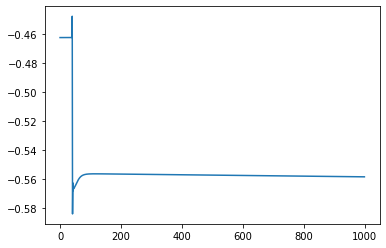

Accurancy is : 80.0 %


In [0]:
predict,theta,J_history=logistic_regression(X_train,X_test,Y_train,0.001,1000,0.001)
plot_figure(J_history)
predict=transform_predict(predict)
#print(predict.shape)
print("Accurancy is :",accurancy(predict,Y_test),"%")
#print(np.squeeze(predict-Y_test).shape)